In [1]:
from random import choice
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
from math import(atan2,erfc,erf,log10)
from numpy import (sin, cos, array, pi, sqrt,hsplit, argmin,arctan,arange,e, arange)
from numpy.random import normal
import matplotlib

In [2]:
#МОДУЛЯТОР
#ВХОДНЫЕ ДАННЫЕ#

#Некоторые константы для передачи сообщения:
f = 1e9                 # частота дескретизации 
F = 1e7                 # частота чипа 
T = 1e-6                # длительность передачи символа 
sigma = 8               # мощность шума 
n = 1000                 # количество бит

bits = [choice([1,-1]) for i in range(n)] 
print(bits)

[1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1]


In [3]:
#Инициализация
quantity_of_counts_on_chip =    round((1/F)/(1/f))
quantity_of_chips_on_bit   =    int(T/(1/F))
quantity_of_counts_on_bit  =    quantity_of_counts_on_chip*quantity_of_chips_on_bit 
N = n*quantity_of_chips_on_bit 
quantity_of_counts_all     =    N*quantity_of_counts_on_chip

counts_on_chip = [t*(1/f) for t in range(0,quantity_of_counts_on_chip)]         
counts_time = [t*(1/f) for t in range(0,quantity_of_counts_all)]                

print('Количество отсчетов на чип:', quantity_of_counts_on_chip)
print('Количество чипов на бит: ',   quantity_of_chips_on_bit )
print('Количество отсчетов на бит: ',quantity_of_counts_on_bit )
print('Общее количество чипов: ', N)
print('Общее количество отсчетов на все сообщение: ',quantity_of_counts_all )

#BPSK.Опорные антиподные символы
sin1 = [ sin(2 * pi * F * t) for t in counts_on_chip]    
sin2 = [ sin(2 * pi * F * t + pi) for t in counts_on_chip] 

Количество отсчетов на чип: 100
Количество чипов на бит:  10
Количество отсчетов на бит:  1000
Общее количество чипов:  1000
Общее количество отсчетов на все сообщение:  100000


In [4]:
def drawGrphs(sigma,bits):

    rcParams['figure.figsize'] = 15,15
    plt.subplot(5,2,1)
    plt.plot(counts_on_chip,sin1,'red') 
    plt.subplot(5,2,2)
    plt.plot(counts_on_chip,sin2,'blue') 
    
    #####################################    
    ImpulseCodeModulation = []
    for i in range(n):
        m = quantity_of_chips_on_bit*quantity_of_counts_on_chip*[1]
        m = [m[k]*bits[i] for k in range(quantity_of_chips_on_bit*quantity_of_counts_on_chip)]
        ImpulseCodeModulation += m
    #####################################        
    message = []
    for bit in bits:
        if bit == 1:
            message += [sin1 for j in range(quantity_of_chips_on_bit)] 
        elif bit == -1:
            message += [sin2 for j in range(quantity_of_chips_on_bit)]
    message = array(message).ravel()
    
    noise = normal(0,sigma,quantity_of_counts_all)
    message_noise = array(message + noise)
        
    ####################################
    plt.subplot(5,1,3)
    a=plt.plot(counts_time,ImpulseCodeModulation) 

    plt.subplot(5,1,4)
    b=plt.plot(counts_time,message,'green') 

    plt.subplot(5,1,5)
    c=plt.plot(counts_time,message_noise,'red')

    plt.show()

In [5]:
def modulatorBPSK(sigma,bits):
    message = []
    for bit in bits:
        if bit == 1:
            message += [sin1 for j in range(quantity_of_chips_on_bit)] 
        elif bit == -1:
            message += [sin2 for j in range(quantity_of_chips_on_bit)]
            
    #Перевод в numpy массивы
    message = array(message).ravel()                                  
        
    #Шума
    noise = normal(0,sigma,quantity_of_counts_all)
    message_noise = array(message + noise)
        
    return message_noise

In [6]:
def deModulatorBPSK(n,message_noise):
    bit1 = (array([sin1 for j in range(quantity_of_chips_on_bit)]) ).ravel()  

    arrived_bits = hsplit(message_noise,n)
    correlation = 0
    new_bits = []

    for i in range(n): 
        correlation = (bit1*arrived_bits[i]).sum() 
        if correlation > 0:                                                 
            new_bits += [1]
        elif correlation < 0:
            new_bits += [-1]
            
        correlation = 0
        
    return array(new_bits)

In [7]:
message = modulatorBPSK(sigma,bits)
new_bits = deModulatorBPSK(n,message)
bits = array(bits).ravel()

In [8]:
#drawGrphs(sigma,bits)

In [9]:
# Теоретическая и практическая вероятность ошибки
E = T/2
No = 2*sigma**2 / f
SN = 2*E/No
ErrTheor = erfc(sqrt(SN/2))/2

PError1= 100*list((bits*new_bits)).count(-1) / n

print('Сигнал-шум:',10*log10(SN))
print('E:',E)
print('N0:',No)
print('Теоретическая вероятность ошибки',round(100*ErrTheor,1),'%')
print('Практическая вероятность ошибки:',PError1,'%')

Сигнал-шум: 0.9691001300805642
E: 5e-07
N0: 8e-07
Теоретическая вероятность ошибки 13.2 %
Практическая вероятность ошибки: 19.0 %


\begin{equation*}\\
Вероятность\ ошибки\ на\ бит:
P_{b}=Q(\sqrt{\frac{2E_{b}}{N_{0}}}) \\
Гауссов\ интеграл\ ошибок:
Q(x) = \int_k^{\infty} \frac{1}{\sqrt2\pi}exp(\frac{-x^2}{2})dx 
\end{equation*}

In [10]:
# Графическое представление

In [11]:
E = T/2              
arrSN = arange(-5,15,1)

In [12]:
# С помощью дополнительной функции ошибок erfc = 1 - erf нахождение теоретических значений Pошибки
# Теоретическое значение ошибки
arrErrThr = [erfc(sqrt(10**(SN/10)/2))/2 for SN in arrSN]

In [13]:
#Расчет средней практической ошибки
quantity_for_medium = 100
arrErrPrt = []

for SN in arrSN:
    Pm = 0
    sig=sqrt((T*f)/(2*10**(SN/10)))   #!!!!
    print(sig)
    for i in range(quantity_for_medium):
        bits = [choice([1,-1]) for i in range(n)]
        mes = modulatorBPSK(sig ,bits)
        new_bits = deModulatorBPSK(n ,mes)
        np_bits =  array(bits).ravel()
        
        Pm += list((np_bits*new_bits)).count(-1)
        
    Pm /= (quantity_for_medium*n)
    arrErrPrt += [Pm]

39.76353643835253
35.43928915419707
31.58529970547121
28.150427993736734
25.089095358284318
22.360679774997898
19.928976826775145
17.761719292909024
15.830148982673414
14.108635131604638
12.574334296829354
11.206887238456494
9.98814876483345
8.901946956877223
7.933868576533667
7.0710678118654755
6.302095820932435
5.616748812614791
5.005932648504533
4.461542169214011


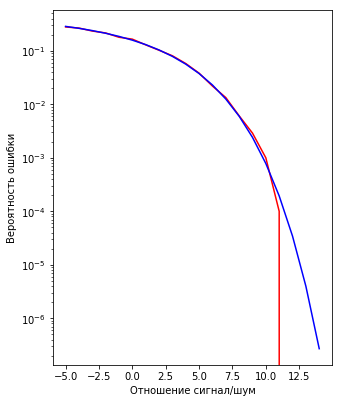

In [14]:
matplotlib.rcParams['figure.figsize'] = 5, 30
gr = plt.subplot(4,1,1)   
gr.set_xlabel('Отношение сигнал/шум')
gr.set_ylabel('Вероятность ошибки')
#Практика
plt.plot(arrSN,arrErrPrt,'red')
#Теория
plt.plot(arrSN,arrErrThr,'blue')
#gr.set_xscale('log')
gr.set_yscale('log')